# Linear Regression Analysis on House Prices

## Load the Preprocessed Data

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

In [88]:
# Load train and test set
X_train = pd.read_csv("./data/X_train.csv")
y_train = pd.read_csv("./data/y_train.csv")
X_test = pd.read_csv("./data/X_test.csv")
y_test = pd.read_csv("./data/y_test.csv")

In [89]:
# Check if the target variable needs to be reshaped into a 1D array
if y_train.shape[1] == 1:
    y_train = y_train.squeeze()
if y_test.shape[1] == 1:
    y_test = y_test.squeeze()

## Fit linear regression models with different types of regularization

### 1. linear regression without regularization

In [149]:
# Initialize the Linear Regression Model
lr = LinearRegression()

# Train the model with the training data
lr.fit(X_train, y_train)

LinearRegression()

In [150]:
# Predict the Test set results
y_pred = lr.predict(X_test)

In [151]:
# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [152]:
# Output model performance
print('Model Performance:')
print('Root Mean Squared Error:', sqrt(mse))
print('R-squared Score:', r2)

Model Performance:
Root Mean Squared Error: 39390.31008679674
R-squared Score: 0.7670318541145231


In [153]:
# Displaying model settings
print('\nModel Settings:')
print(lr.get_params())


Model Settings:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


### 2. linear regression with L1 regularization

In [155]:
# Implement cross validation to find the best alpha for the regularization
alphas = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000] 
lasso = LassoCV(alphas=alphas, max_iter=10000, cv=5)

# Train the model with the training data
lasso.fit(X_train, y_train)

LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10, 100, 1000], cv=5, max_iter=10000)

In [156]:
# Predict the Test set results
y_pred = lasso.predict(X_test)

In [157]:
# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [158]:
# Output model performance
print('Model Performance:')
print('Root Mean Squared Error:', sqrt(mse))
print('R-squared Score:', r2)

Model Performance:
Root Mean Squared Error: 38337.05174158005
R-squared Score: 0.7793239681391044


In [159]:
# Displaying model settings
print('\nModel Settings:')
print(lasso.get_params())


Model Settings:
{'alphas': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'copy_X': True, 'cv': 5, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 10000, 'n_alphas': 100, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}


### 3. linear regression with L2 regularization

In [161]:
# Implement cross validation to find the best alpha for the regularization
alphas = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000] 
ridge = RidgeCV(alphas=alphas, cv=5)

# Train the model with the training data
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
        cv=5)

In [162]:
# Predict the Test set results
y_pred = ridge.predict(X_test)

In [163]:
# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [164]:
# Output model performance
print('Model Performance:')
print('Root Mean Squared Error:', sqrt(mse))
print('R-squared Score:', r2)

Model Performance:
Root Mean Squared Error: 37612.72062241235
R-squared Score: 0.7875839931919417


In [166]:
# Displaying model settings
print('\nModel Settings:')
print(ridge.get_params())


Model Settings:
{'alpha_per_target': False, 'alphas': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'normalize': 'deprecated', 'scoring': None, 'store_cv_values': False}


### 4. linear regression with elastic net (L1+L2) regularization

In [168]:
# Implement cross validation to find the best alpha for the regularization
alphas = [0.01, 0.01, 0.1, 1.0, 10, 100, 1000] 
enet = ElasticNetCV(alphas=alphas, max_iter=10000, cv=5)

# Train the model with the training data
enet.fit(X_train, y_train)

ElasticNetCV(alphas=[0.01, 0.01, 0.1, 1.0, 10, 100, 1000], cv=5, max_iter=10000)

In [169]:
# Predict the Test set results
y_pred = enet.predict(X_test)

In [170]:
# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [171]:
# Output model performance
print('Model Performance:')
print('Root Mean Squared Error:', sqrt(mse))
print('R-squared Score:', r2)

Model Performance:
Root Mean Squared Error: 37178.98757104054
R-squared Score: 0.7924547193558505


In [172]:
# Displaying model settings
print('\nModel Settings:')
print(enet.get_params())


Model Settings:
{'alphas': [0.01, 0.01, 0.1, 1.0, 10, 100, 1000], 'copy_X': True, 'cv': 5, 'eps': 0.001, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'n_alphas': 100, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': 0}


## Model Selection and Interpretation

Based on the model performance, RMSE and R-squared, linear regression with elastic net regularization model performs the best. Therefore, we choose it for further interpretation.

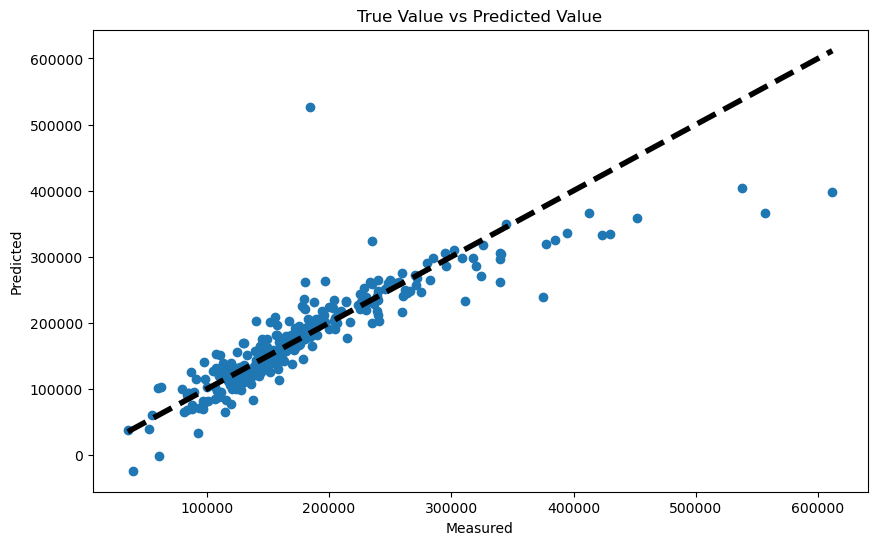

In [174]:
# Plotting the true vs predicted values for visual analysis
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('True Value vs Predicted Value')
plt.show()

The model achieved an RMSE of approximately 37178.99, indicating the average error in the house price predictions made by our model is about  $37,178.99. The R-squared value of 0.79 suggests that the model explains 79\% of the variance in house prices, which is a moderate fit.

While the model demonstrates a fair predictive ability, the scatter plot indicates some discrepancies between the predicted and actual values when the sale price is greater than $300000. This implies potential areas for model improvement, possibly through more complex modeling techniques or additional feature engineering.

In [176]:
# Get top features of the model
feature_names = X_train.columns
coefficients = enet.coef_
importance = np.abs(coefficients)
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
enet_features, enet_importances = zip(*feature_importance)

# Output top 10 features and their coefficients
print("\nTop features for Elastic net Regression:")
for feature, imp in zip(enet_features[:10], enet_importances[:10]):
    print(f"{feature}: {imp}")


Top features for Elastic net Regression:
OverallQual: 10394.11394895319
GrLivArea: 9179.591435100314
1stFlrSF: 6248.029706226292
ExterQual: 6040.11889214379
KitchenQual: 5727.8698174056335
MasVnrArea: 5543.512475304737
2ndFlrSF: 5349.280366738617
TotalBsmtSF: 5347.260619713412
BsmtQual: 5013.410253246516
BsmtExposure: 4814.363208557402


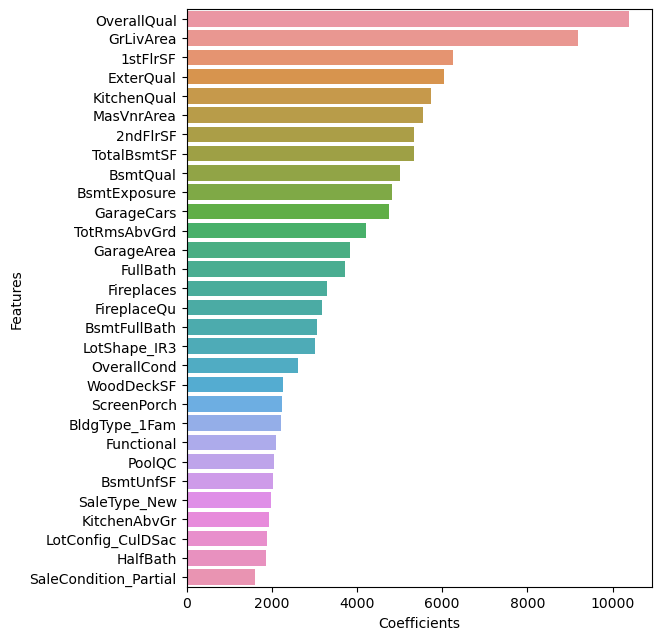

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

info = pd.DataFrame({'Coefficients': importance, 'Features': feature_names})
info_sorted = info.sort_values('Coefficients', ascending=False)
top_features = info_sorted[:30]

plt.figure(figsize=(6, 0.25*30))
sns.barplot(data=top_features, y='Features', x='Coefficients')
